In [23]:
import sys
sys.path.append('../../..')
from viz.match_data import extract_match_complete
from viz.pass_network import plot_pass_network
from viz.pass_analysis import plot_pass_flow, plot_pass_hull
from viz.shot_xg import plot_shot_xg
from viz.shot_map_report import plot_shot_report
from viz.stats_table import create_player_analysis_complete
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Constantes del partido
WS_MATCH_ID = 1913917      # WhoScored match ID
US_MATCH_ID = 29165        # Understat match ID
LEAGUE = "ESP-La Liga"
SEASON = "25-26"
HOME_TEAM = "Espanyol"
AWAY_TEAM = "Atletico" 
MATCH_DATE = "2025-08-17"

# Paths para logos
ESPANYOL_LOGO = "../logos/LaLiga/Espanyol.png"
ATLETICO_LOGO = "../logos/LaLiga/Atleti.png"
LALIGA_LOGO = "../logos/LaLiga/la-liga.png"

In [25]:
result = extract_match_complete(
    ws_id=WS_MATCH_ID,
    us_id=US_MATCH_ID, 
    league=LEAGUE,
    season=SEASON,
    home_team=HOME_TEAM,
    away_team=AWAY_TEAM,
    match_date=MATCH_DATE
)


Extracting: Espanyol vs Atletico (2025-08-17)
--------------------------------------------------
1. match_events.csv: 1959 events
2. player_network.csv: 280 records
3. match_aggregates.csv: 68 records
4. spatial_analysis.csv: 50 spatial records
5. match_info.csv: 95 info records

Shots: 24 | Goals: 3 | xG: 2.71


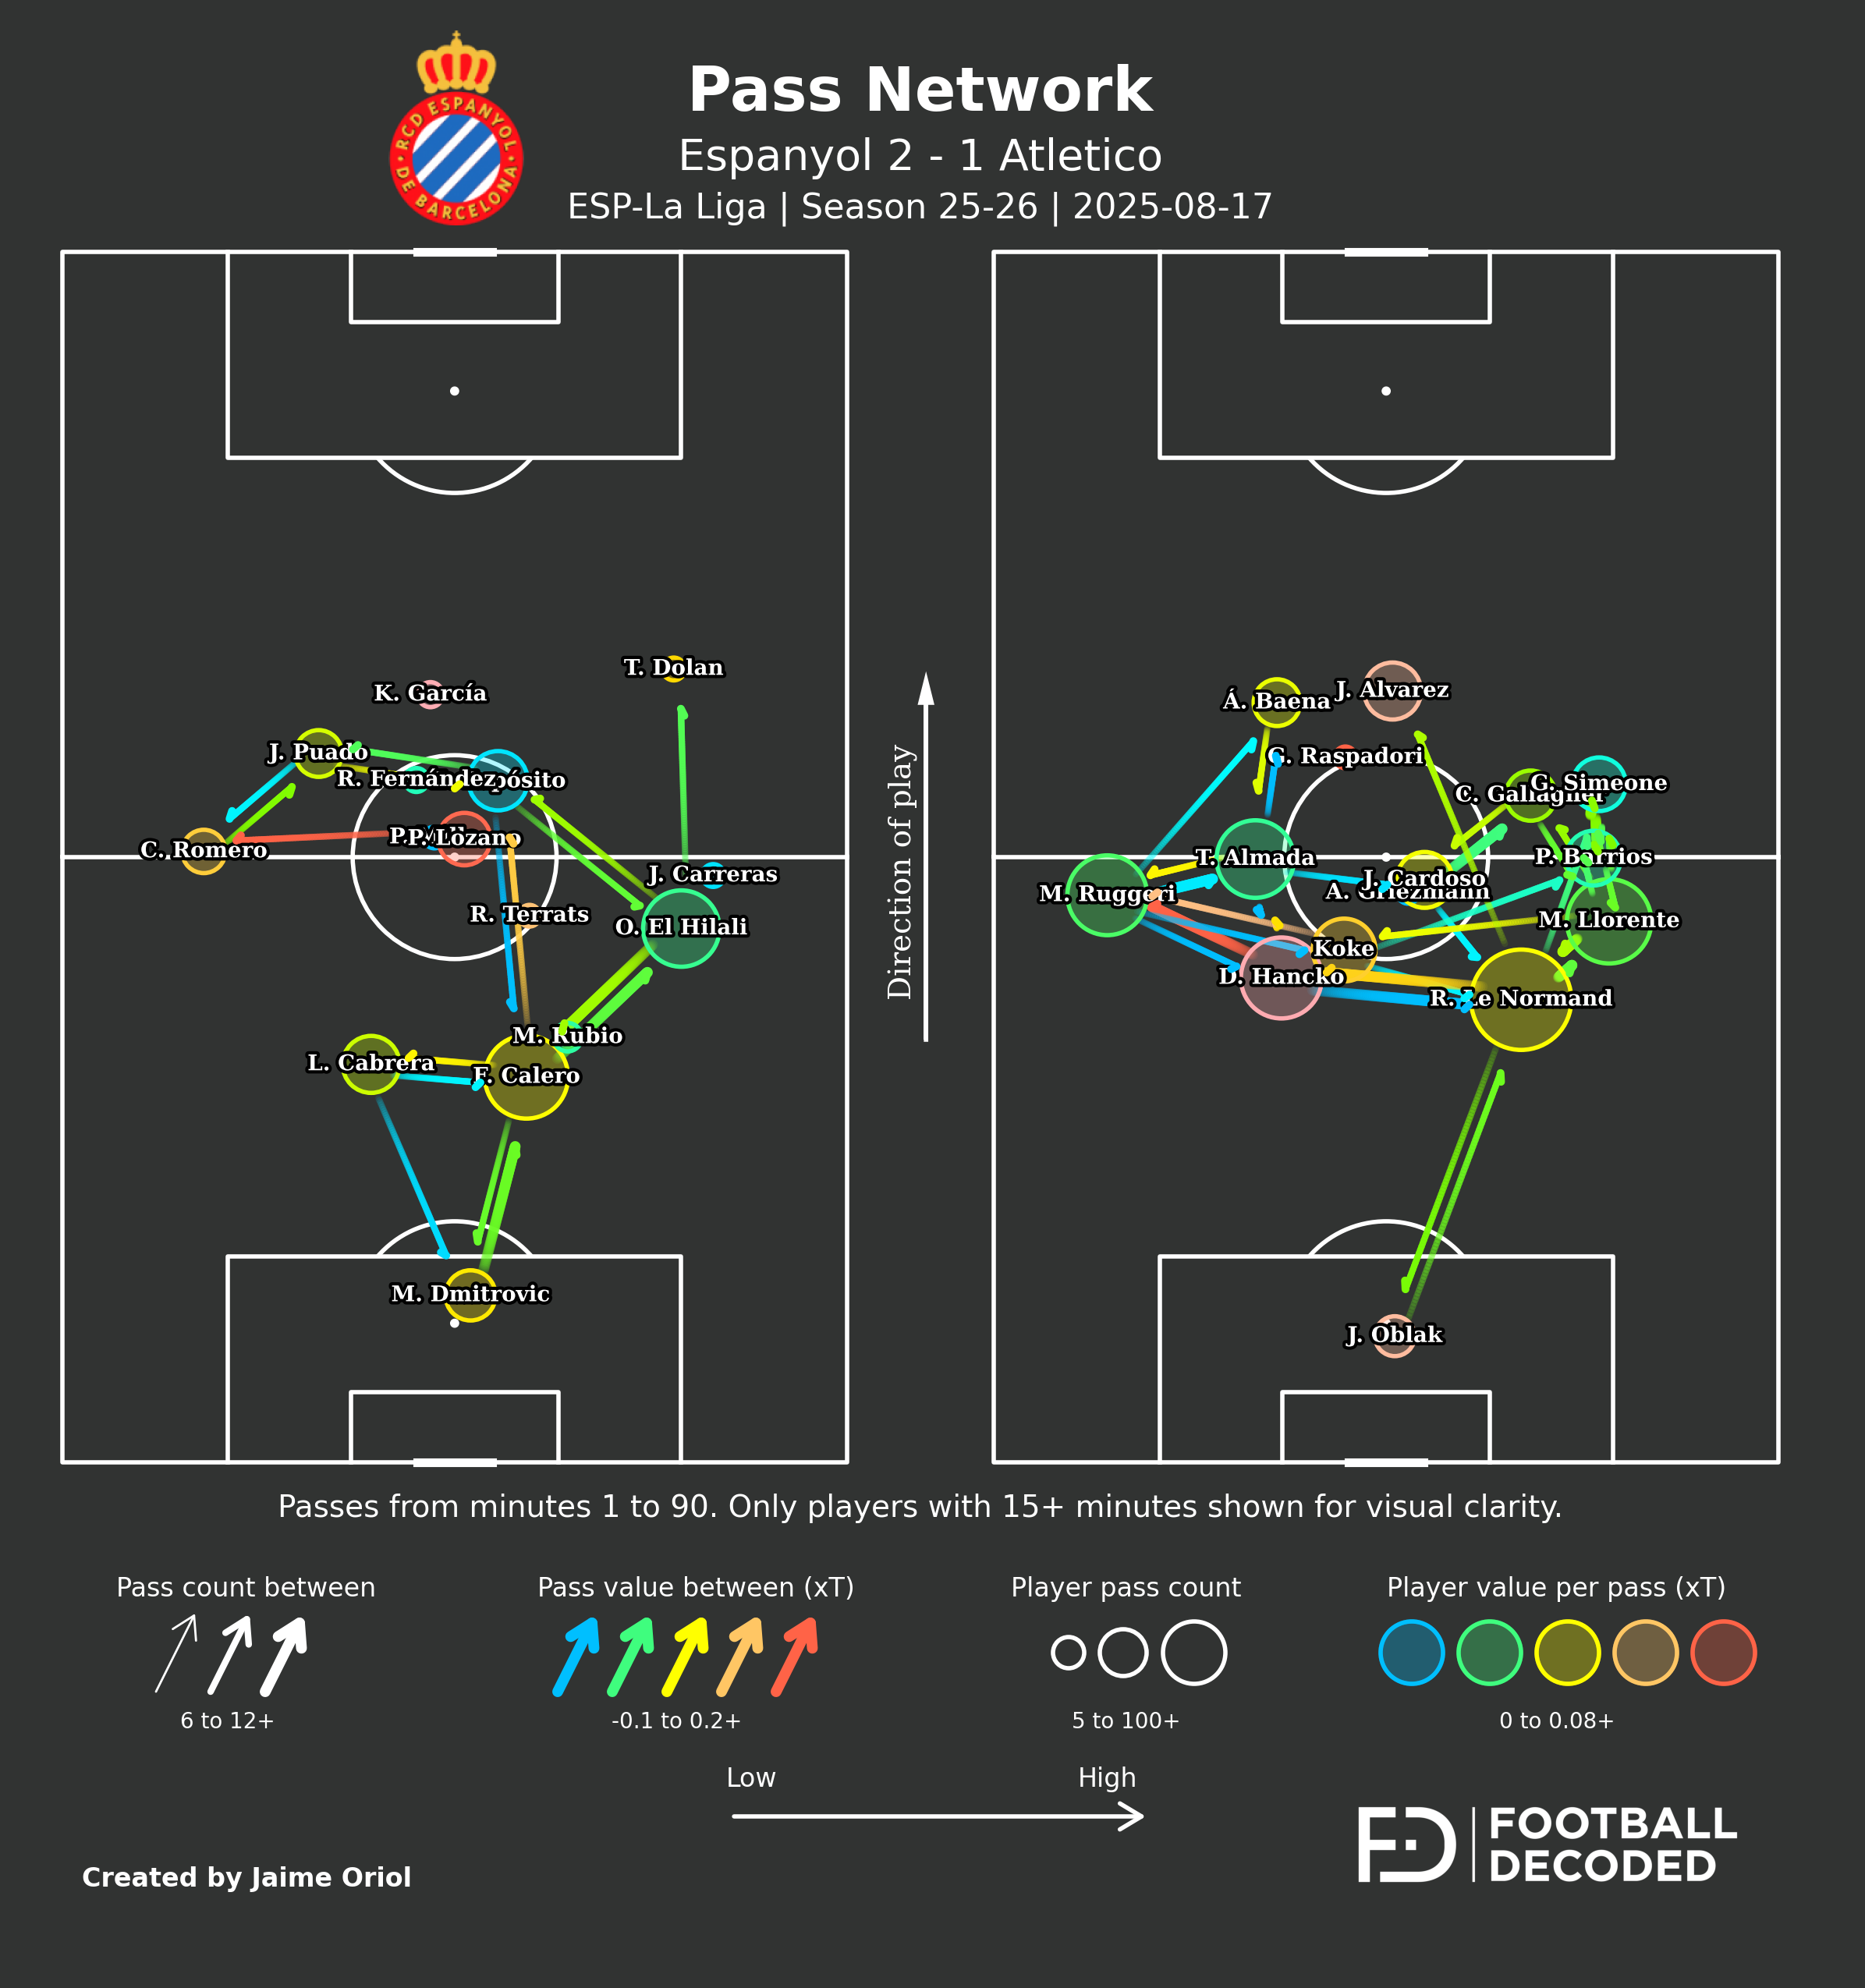

In [26]:
# Pass Network del partido completo
fig_full = plot_pass_network(
    network_csv_path='../../viz/data/player_network.csv',
    info_csv_path='../../viz/data/match_info.csv', 
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_logo_path=ESPANYOL_LOGO,
    away_logo_path=ATLETICO_LOGO
)

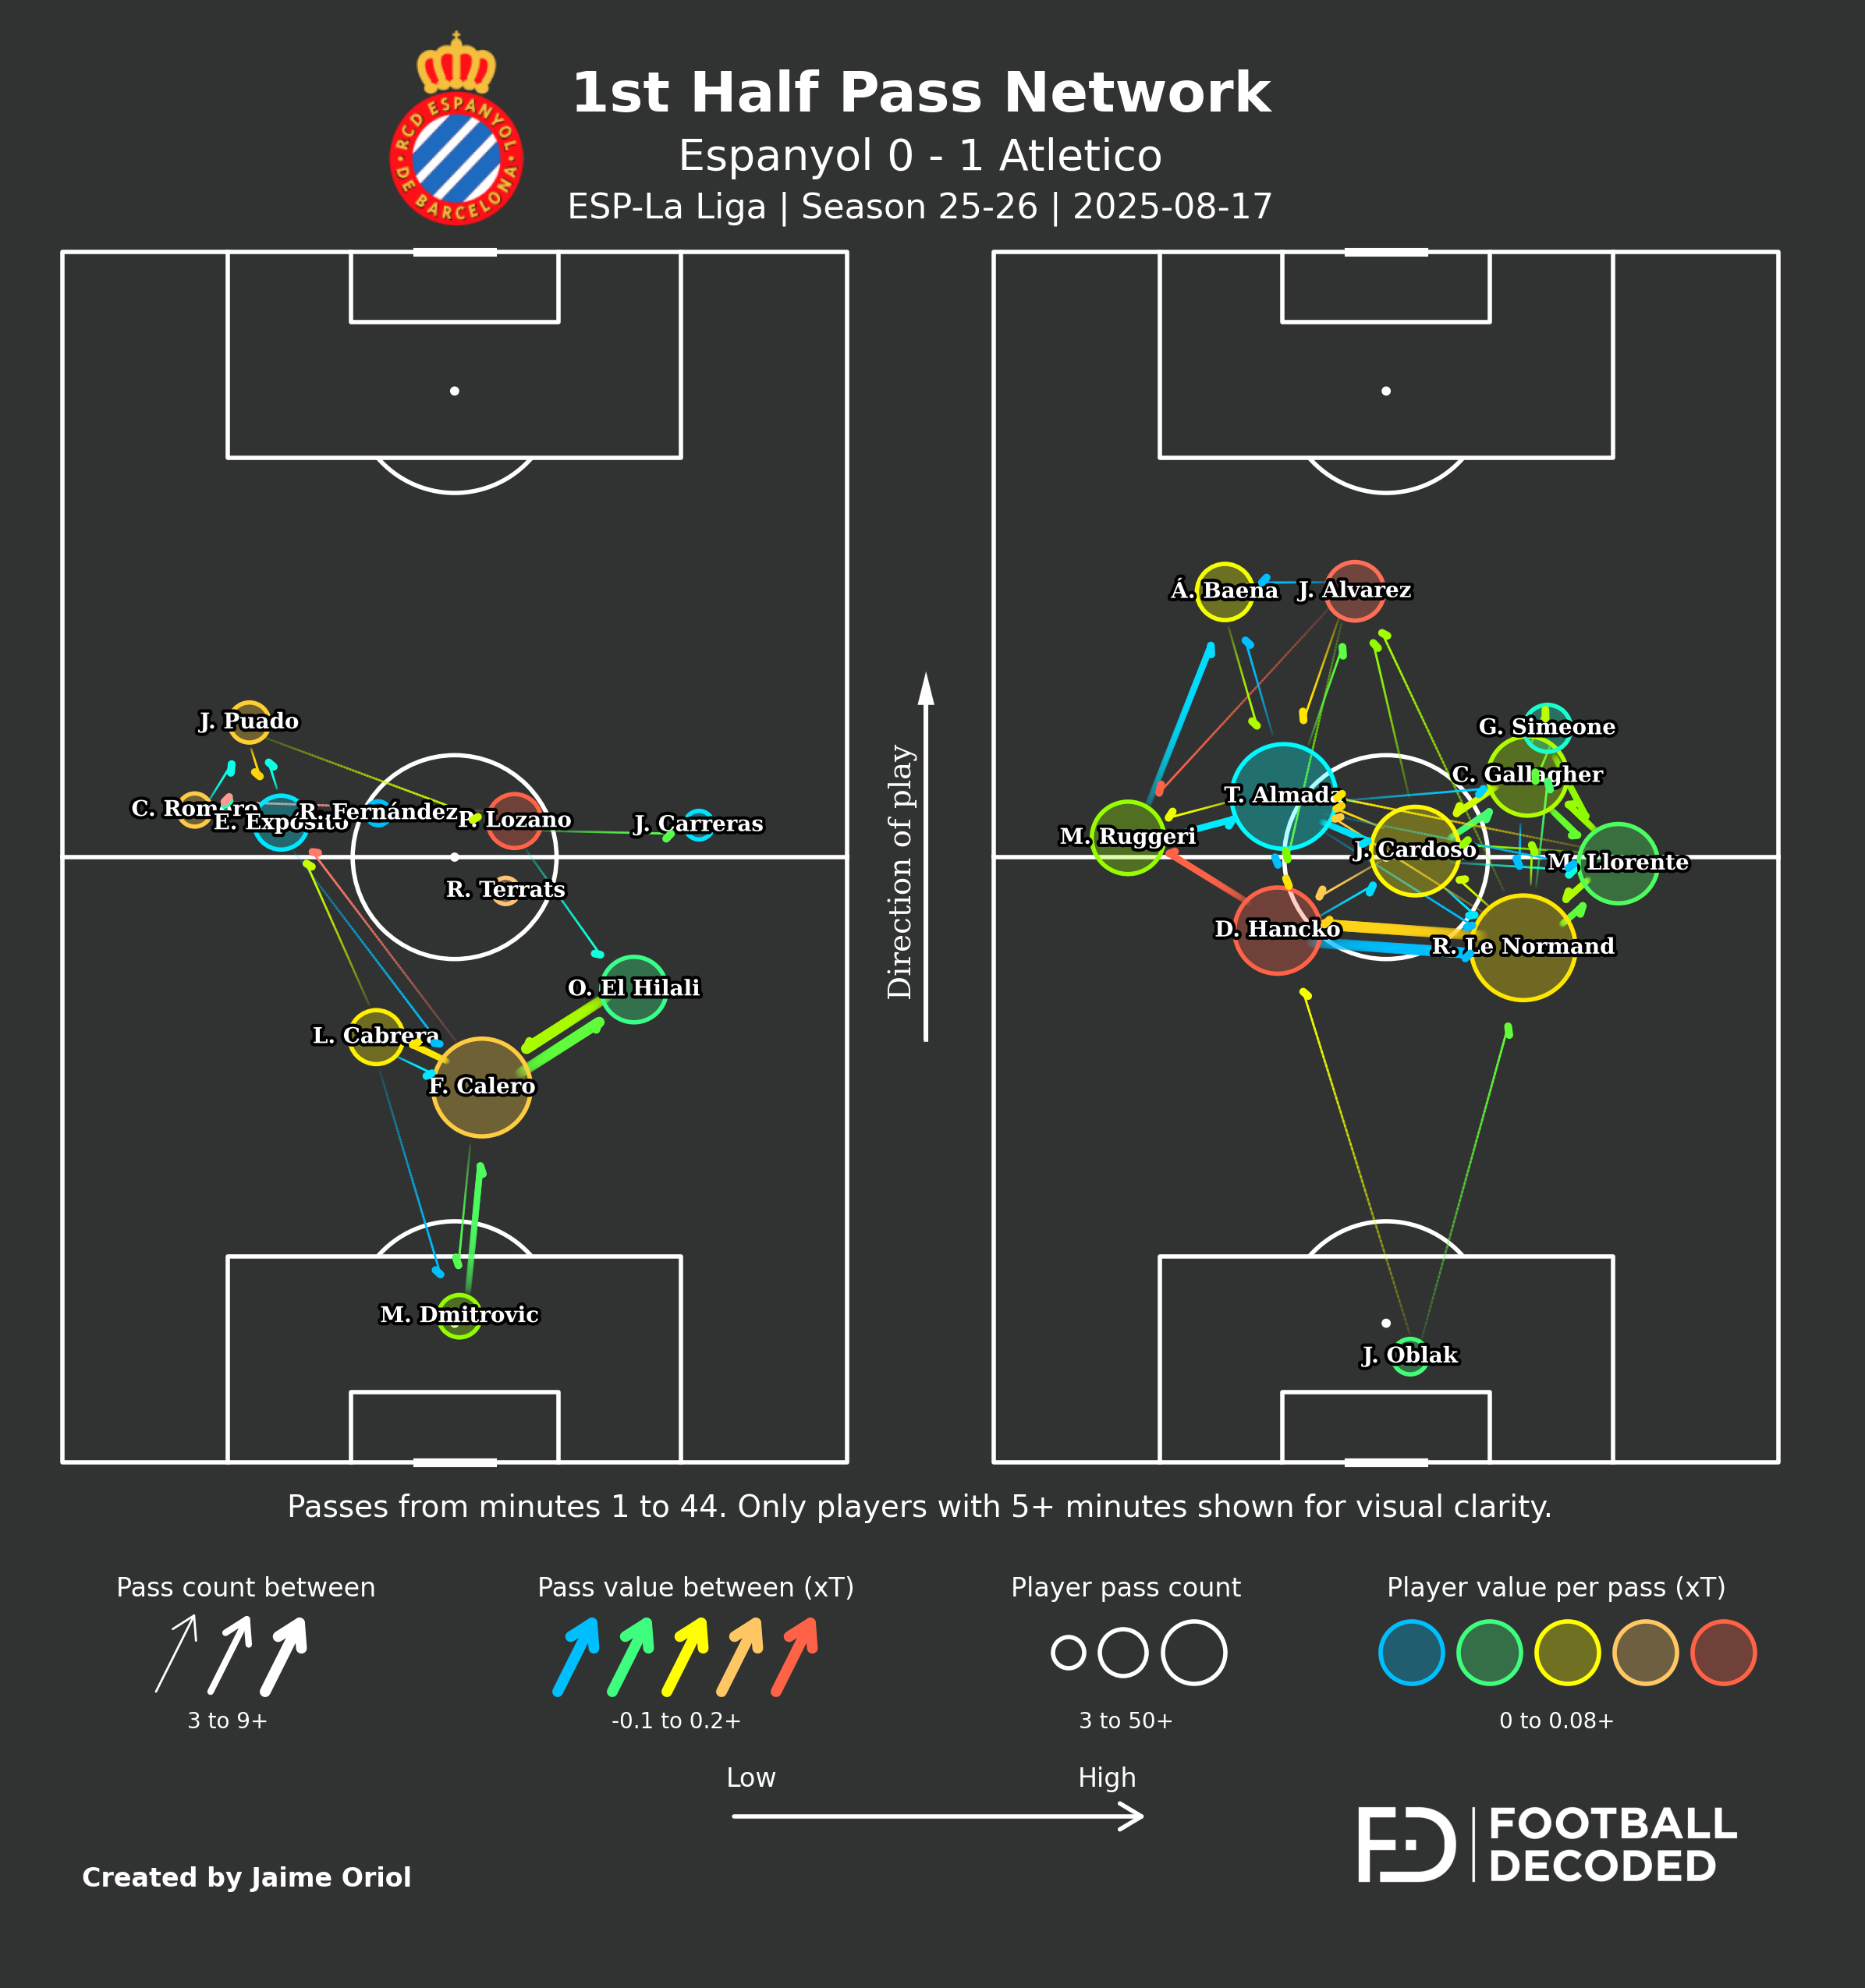

In [27]:
# Pass network primer tiempo (jugadores >5 minutos primer tiempo)
from viz.pass_network import plot_pass_network_first_half

# Pass Network - Primera mitad
fig_1h = plot_pass_network_first_half(
    network_csv_path='../../viz/data/player_network.csv',
    info_csv_path='../../viz/data/match_info.csv', 
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_logo_path=ESPANYOL_LOGO,
    away_logo_path=ATLETICO_LOGO
)

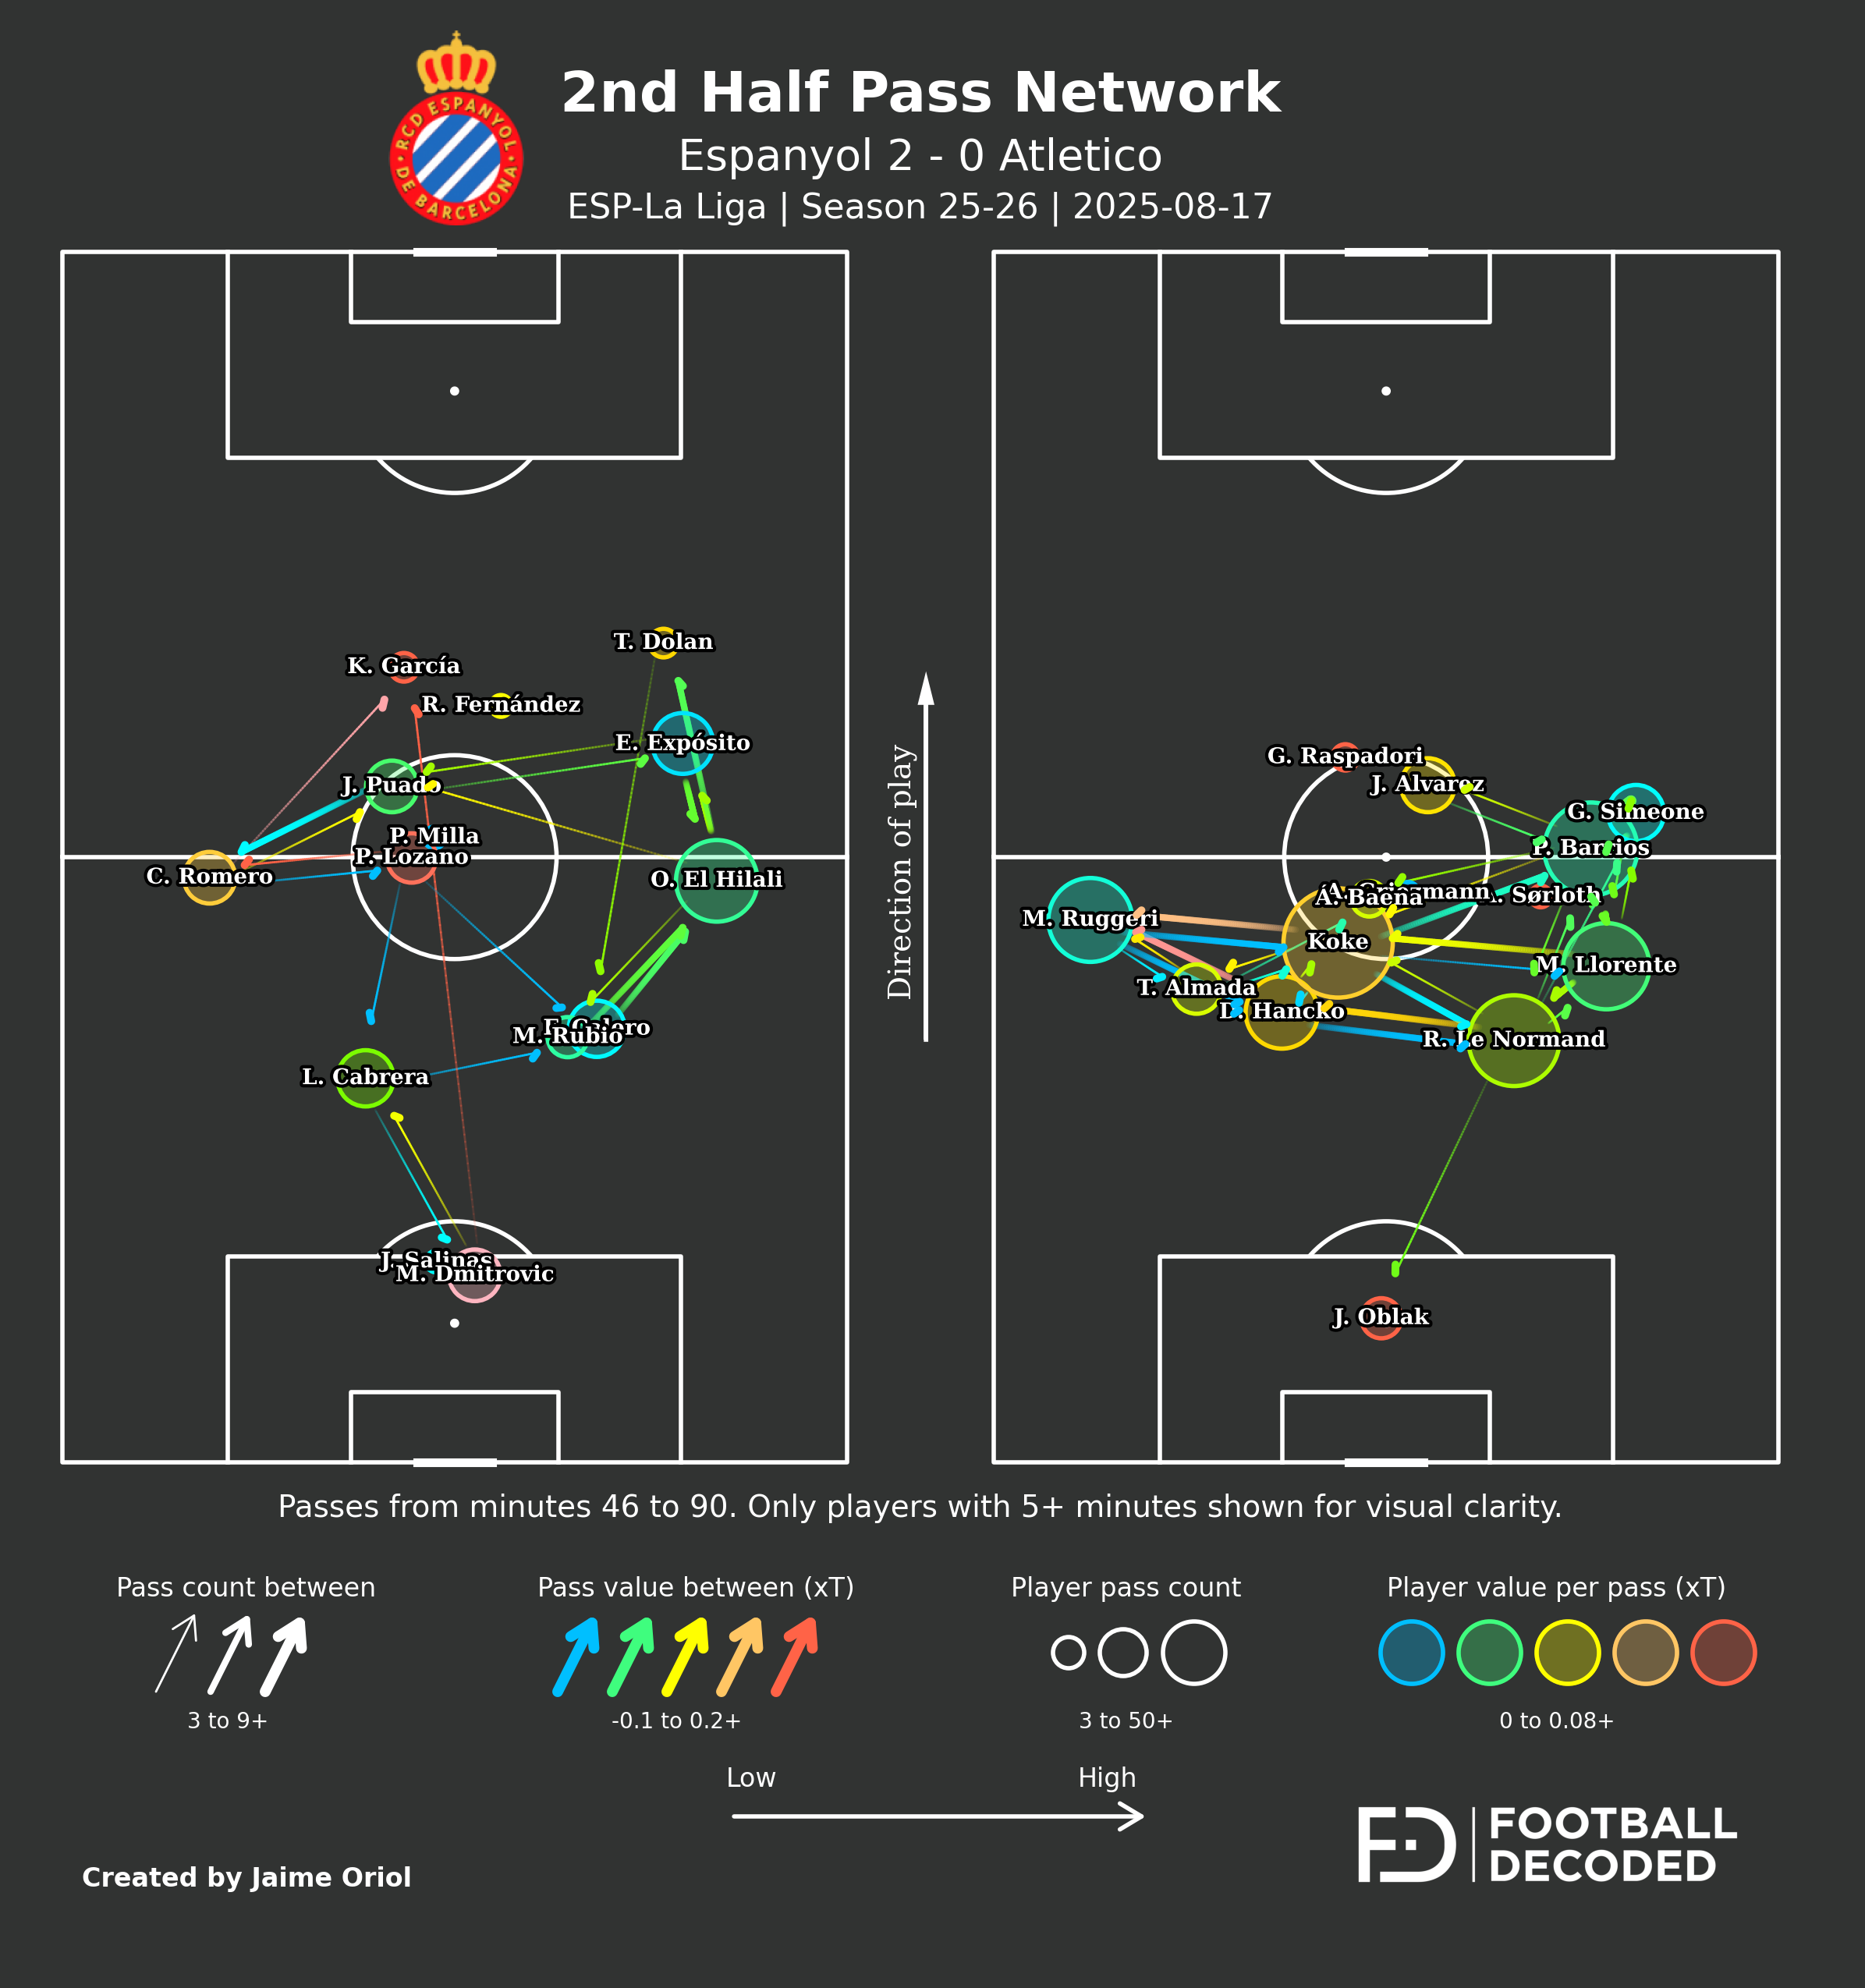

In [28]:
# Pass network segundo tiempo (jugadores >5 minutos segundo tiempo)
from viz.pass_network import plot_pass_network_second_half

# Pass Network - Primera mitad
fig_1h = plot_pass_network_second_half(
    network_csv_path='../../viz/data/player_network.csv',
    info_csv_path='../../viz/data/match_info.csv', 
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_logo_path=ESPANYOL_LOGO,
    away_logo_path=ATLETICO_LOGO
)

In [29]:
# Preparar datos de disparos
def create_shots_csv():
    events = pd.read_csv('../../viz/data/match_events.csv')
    shots = events[events['event_type'].str.contains('Shot|Goal', case=False, na=False)].copy()
    shots['is_goal'] = shots['event_type'] == 'Goal'
    shots['body_part'] = shots['qualifiers'].str.contains('Head', na=False).map({True: 'Head', False: 'Foot'})
    shots['xg'] = pd.to_numeric(shots['xg'], errors='coerce').fillna(0.0)
    shots.to_csv('../../viz/data/shots_temp.csv', index=False)

    return shots

shots_data = create_shots_csv()

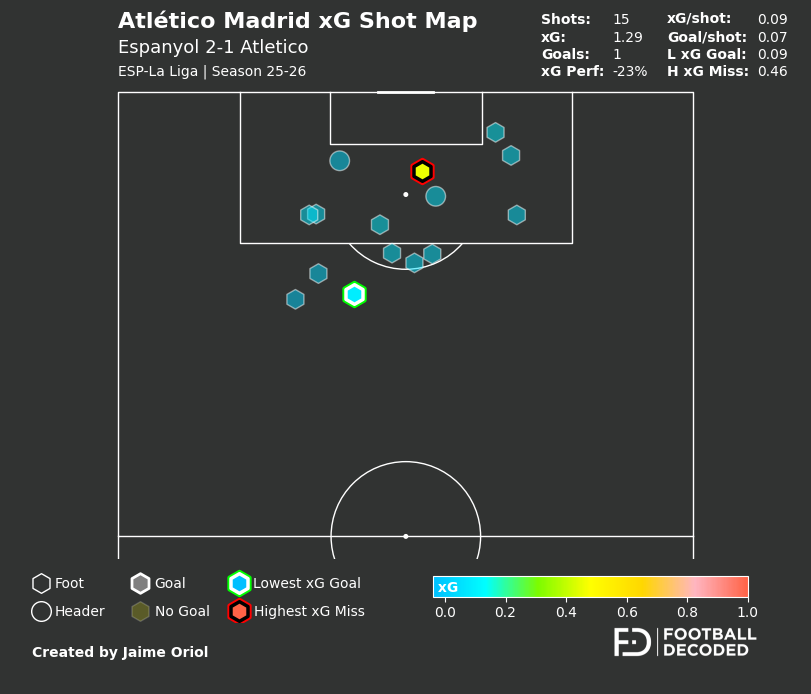

In [30]:
# Shot Map - Atlético Madrid únicamente
fig_atm = plot_shot_xg(
    csv_path='../../viz/data/shots_temp.csv',
    filter_by='Atletico',
    logo_path=ATLETICO_LOGO,
    title_text='Atlético Madrid xG Shot Map',
    subtitle_text=f'{HOME_TEAM} 2-1 {AWAY_TEAM}',
    subsubtitle_text=f'{LEAGUE} | Season {SEASON}'
)

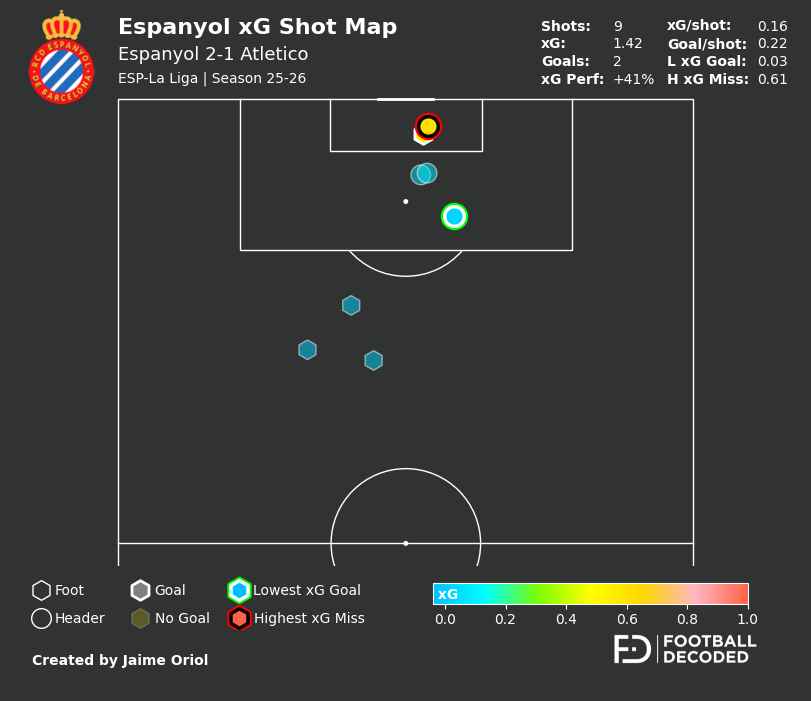

In [31]:
# Shot Map - Espanyol únicamente  
fig_esp = plot_shot_xg(
    csv_path='../../viz/data/shots_temp.csv',
    filter_by='Espanyol',
    logo_path=ESPANYOL_LOGO,
    title_text='Espanyol xG Shot Map',
    subtitle_text=f'{HOME_TEAM} 2-1 {AWAY_TEAM}',
    subsubtitle_text=f'{LEAGUE} | Season {SEASON}'
)

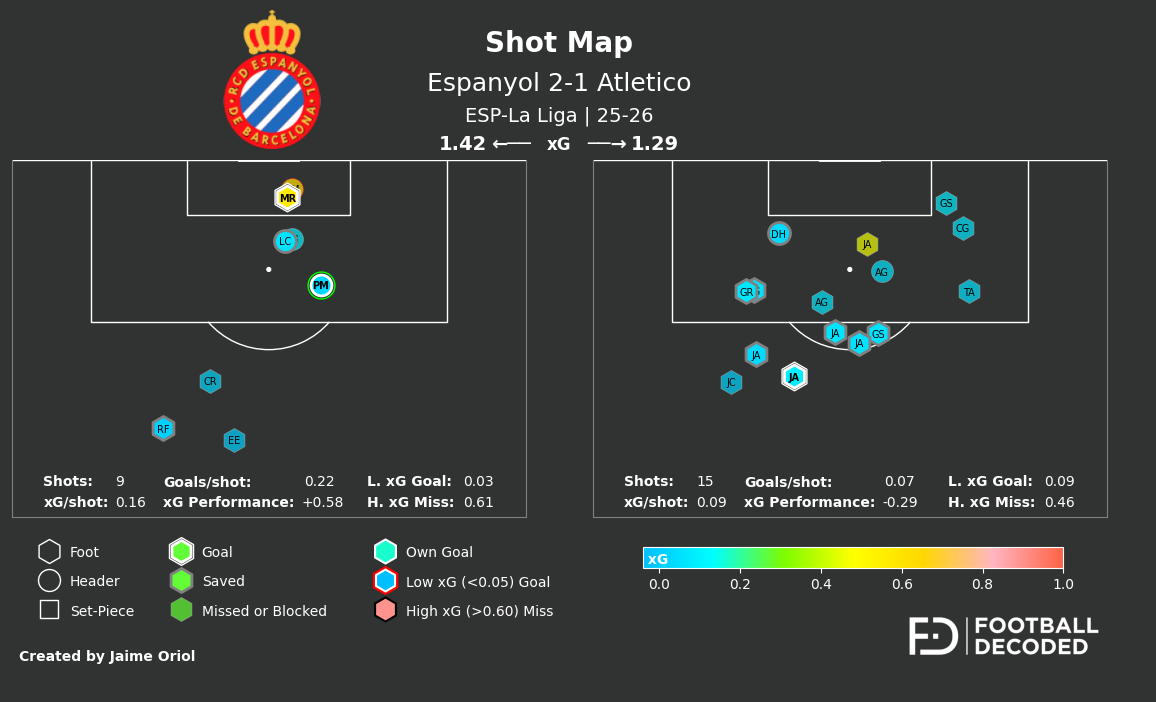

In [32]:
# Shot Map Report
fig_report = plot_shot_report(
    csv_path='../../viz/data/shots_temp.csv',
    home_logo_path=ESPANYOL_LOGO,
    away_logo_path=ATLETICO_LOGO,
    season='25-26'
)